In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [33]:
plt.style.use('seaborn-white')

In [36]:
from matplotlib import cycler 
colors = cycler('color',
                           ['#EE6666', '#3388BB', '#9988DD',
                            '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
      axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [8]:
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

## Data Exploration

### Calendar.csv

In [9]:
# Calendar.csv stores data of airbnb unique id and whether it's available with a price
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [12]:
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [13]:
calendar.isnull().mean()

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [26]:
calendar.listing_id.nunique()

3818

In [31]:
calendar.date.max()

'2017-01-02'

In [30]:
calendar.date.min()

'2016-01-04'

Text(0.5, 1.0, 'Price Distribution')

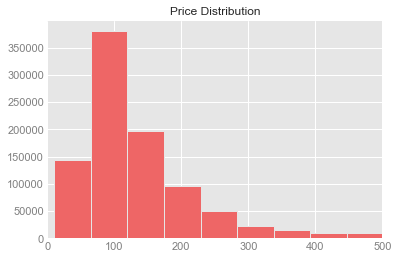

In [62]:
calendar.price.hist(bins = 30)
plt.xlim(0,500)
plt.title('Price Distribution')

In [64]:
calendar.describe()

,listing_id,price
count,1.393570e+06,934542.000000
mean,5.550111e+06,137.944859
std,2.962274e+06,105.062870
min,3.335000e+03,10.000000
25%,3.258213e+06,75.000000
50%,6.118244e+06,109.000000
75%,8.035212e+06,160.000000
max,1.034016e+07,1650.000000


### listings.csv

In [65]:
#listings.csv stores data with airbnb link and details of the house
pd.set_option('display.max_columns', 500)
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [67]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [ ]:
#Pick up some useful columns

In [66]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

<AxesSubplot:>

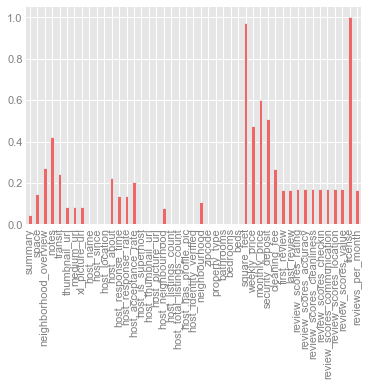

In [77]:
listing_missing_value = listings.isnull().mean()
listing_missing_columns = listing_missing_value[listing_missing_value>0]

listing_missing_columns.plot.bar()


In [68]:
listings.host_id.nunique()

2751

In [69]:
listings.id.nunique()

3818

In [23]:
listings.shape

(3818, 92)

In [15]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


### reviews.csv

In [11]:
#reviewers comments on each house
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [20]:
reviews.isnull().mean()

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000212
dtype: float64

## Data Preparation

### calendar

In [55]:
calendar["price"] = calendar['price'].str.replace('$','')
calendar["price"] = calendar['price'].str.replace(',','')
calendar['price'] = calendar['price'].astype('float')
calendar.head()

/var/folders/db/0dwf3kds6j10nl3vmlwx57tc0000gn/T/ipykernel_31566/1435805306.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar["price"] = calendar['price'].str.replace('$','')


,listing_id,date,available,price,price_cleaned
0,241032,2016-01-04,t,85.0,85.00
1,241032,2016-01-05,t,85.0,85.00
2,241032,2016-01-06,f,NaN,NaN
3,241032,2016-01-07,f,NaN,NaN
4,241032,2016-01-08,f,NaN,NaN


In [243]:
calendar['year']=pd.Series(pd.to_datetime(calendar.date).dt.year)
calendar['month']=pd.Series(pd.to_datetime(calendar.date).dt.month)

### listings

In [223]:
# List of functions needed to clean datasets
# calendar and listings are two correlated datasets which should be joined together for analysis purposes

    
def listings_clean(df):
    '''Extract year/month/month day from the date column
    df['year']=int(df['date'].str.split('-')[0])
    df['month']=int(df['date'].str.split('-')[1])
    df['month_day']=int(df['date'].str.split('-')[2])  '''

    '''clean price field'''
    df.dropna(subset=['price'], inplace = True)
    df["price"] = df['price'].str.replace('$','')
    df["price"] = df['price'].str.replace(',','')
    df['price'] = df['price'].astype('float')
    df['price_percentile'] = pd.qcut(df['price'], 5, labels= ['0.2','0.4','0.6','0.8','1.0'],duplicates = 'drop')
    
    '''clean rate field'''
    df['host_response_rate'] = df['host_response_rate'].str.replace('%','').astype('float')
    df['host_response_rate_cleaned'] = df['host_response_rate'].fillna(df['host_response_rate'].mean())
    df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%','').astype('float')
    df['host_acceptance_rate_cleaned']=df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mean())
    
    '''generate a few more useful features'''
    df['bathrooms'].fillna(df['bathrooms'].mode()[0],inplace = True)
    df['bedrooms'].fillna(df['bedrooms'].mode()[0],inplace = True)
    df['beds'].fillna(df['beds'].mode()[0],inplace = True)
    df['bathroom_per_accommodates'] = df['bathrooms']/df['accommodates']
    df['beds_per_accommodates'] = df['beds']/df['accommodates']
    
    
    df['host_total_listings_count'].fillna(df['host_total_listings_count'].mean(), inplace = True)
    df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace = True)
    
    
    '''Drop useless columns, we wont focus on text mining in this case, so remove all the text related columns '''
    columns_to_drop = ['listing_url', 'name','scrape_id', 'summary',
       'space', 'description', 'experiences_offered','neighborhood_overview','host_neighbourhood','neighbourhood_group_cleansed',
            'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url','neighbourhood_cleansed',
       'xl_picture_url','host_url', 'host_name','host_about', 'host_response_time','host_thumbnail_url', 'host_picture_url',
           'host_listings_count','host_verifications','street', 'city', 'state','market','smart_location', 'country_code', 'country', 
       'is_location_exact','amenities', 'square_feet','weekly_price', 'monthly_price','extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability','security_deposit', 'cleaning_fee',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped','first_review','review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','license', 'jurisdiction_names', 'instant_bookable',
            'calculated_host_listings_count','reviews_per_month','host_response_rate','host_acceptance_rate']
    df.drop(columns_to_drop,axis = 1, inplace = True)
    return df


In [224]:
listings_cleaned = listings_clean(listings)
listings_cleaned.head()

/var/folders/db/0dwf3kds6j10nl3vmlwx57tc0000gn/T/ipykernel_31566/3686767915.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["price"] = df['price'].str.replace('$','')


,id,last_scraped,host_id,host_since,host_location,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,number_of_reviews,review_scores_rating,requires_license,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price_percentile,host_response_rate_cleaned,host_acceptance_rate_cleaned,bathroom_per_accommodates,beds_per_accommodates
0,241032,2016-01-04,956883,2011-08-11,"Seattle, Washington, United States",f,3.0,t,t,Queen Anne,98119,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,2,207,95.000000,f,moderate,f,f,0.4,96.000000,100.000000,0.250000,0.250000
1,953595,2016-01-04,5177328,2013-02-21,"Seattle, Washington, United States",t,6.0,t,t,Queen Anne,98119,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,150.0,1,43,96.000000,f,strict,t,t,0.8,98.000000,100.000000,0.250000,0.250000
2,3308979,2016-01-04,16708587,2014-06-12,"Seattle, Washington, United States",f,2.0,t,t,Queen Anne,98119,47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,975.0,10,20,97.000000,f,strict,f,f,1.0,67.000000,100.000000,0.409091,0.636364
3,7421966,2016-01-04,9851441,2013-11-06,"Seattle, Washington, United States",f,1.0,t,t,Queen Anne,98119,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,100.0,1,0,94.539262,f,flexible,f,f,0.6,94.886798,99.967159,0.333333,0.666667
4,278830,2016-01-04,1452570,2011-11-29,"Seattle, Washington, United States",f,2.0,t,t,Queen Anne,98119,47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,450.0,6,38,92.000000,f,strict,f,f,1.0,100.000000,99.967159,0.333333,0.500000


In [169]:
calendar_listings = pd.merge(calendar,listings_cleaned,left_on = 'listing_id',right_on = 'id')
calendar_listings.shape

(1393570, 34)

## Business Questions
1. Which area has most listings and which area airbnb averge price is the highest
2. What are the busiest times of the year to visit Seattle
3. What's the most popular property type and room type and how that influence the price.

 - What are the busiest times of the year to visit Seattle?
 - From below line chart we can see the available uint of seattle is lowest around July which is Summer, this makes sense because summer is best time to visit Seattle. And winter time would have more available unit.


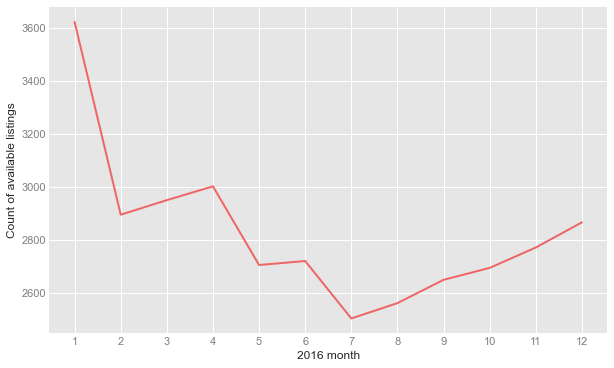

In [256]:
listings_by_month = calendar[calendar.available == 't'].groupby('month')['listing_id'].nunique()
plt.figure(figsize = (10,6))
sns.lineplot(x=listings_by_month.index, y = listings_by_month.values)
plt.xticks(np.arange(1,13,step = 1))
plt.xlabel('2016 month')
plt.ylabel('Count of available listings')
plt.show()

- What's the most popular property type and room type and how that influence the price?
- From below correlation scatterplot result, we can see there's a clear relationship between room type and price, entire home/apt has the highest price and then private room and the cheapest is shared room. And among the listings, entire apartment has the most listings.

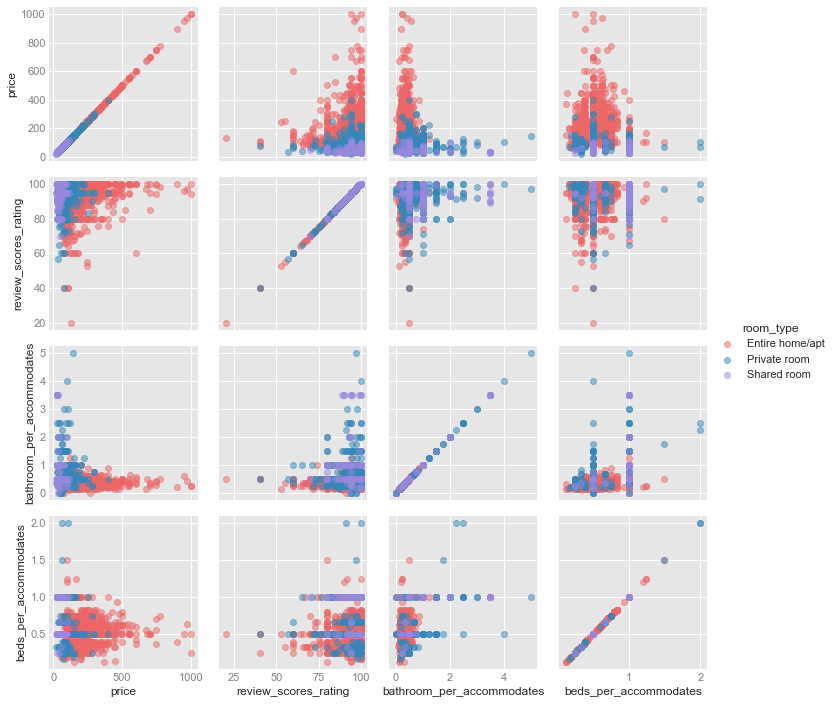

In [173]:
g = sns.PairGrid(listings_cleaned,vars=['price','review_scores_rating','bathroom_per_accommodates','beds_per_accommodates'],hue = 'room_type')
g.map(plt.scatter,alpha = 0.5)
g.add_legend()

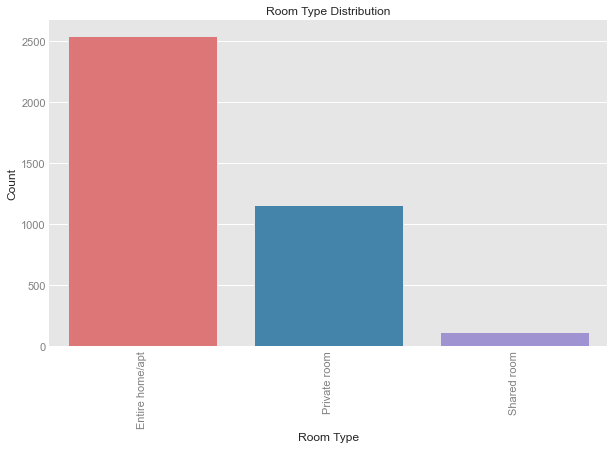

In [184]:
plt.figure(figsize = (10,6))
sns.countplot(data = listings_cleaned, x = 'room_type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Distribution')
plt.xticks(rotation = 90)
plt.show()

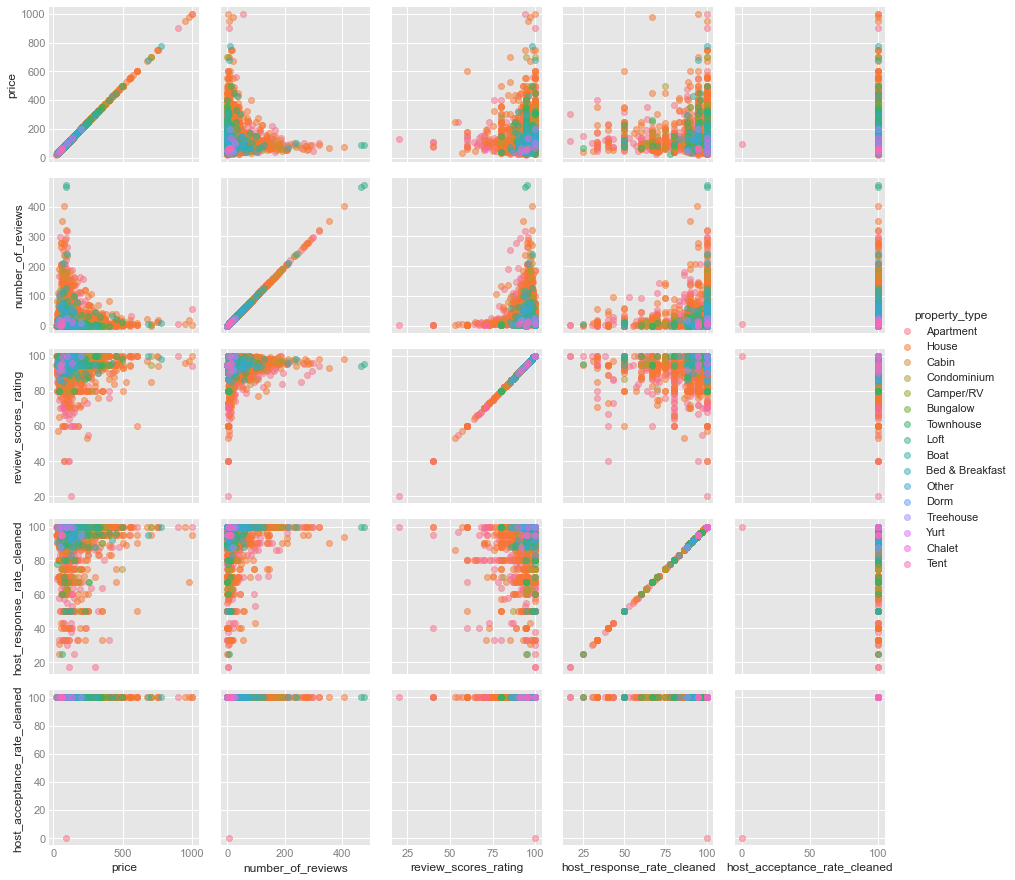

In [170]:
g = sns.PairGrid(listings_cleaned,vars=['price','number_of_reviews','review_scores_rating','host_response_rate_cleaned','host_acceptance_rate_cleaned'],hue = 'property_type')
g.map(plt.scatter,alpha = 0.5)
g.add_legend()

- Which area has most listings and which area airbnb averge price is the highest?
- From below sorted bar plot, we can see Capitol Hill has the most listings around 350 and the second one is Bllard. The highest averge price area is Fairmount Park while the second expensive one is Industrial District

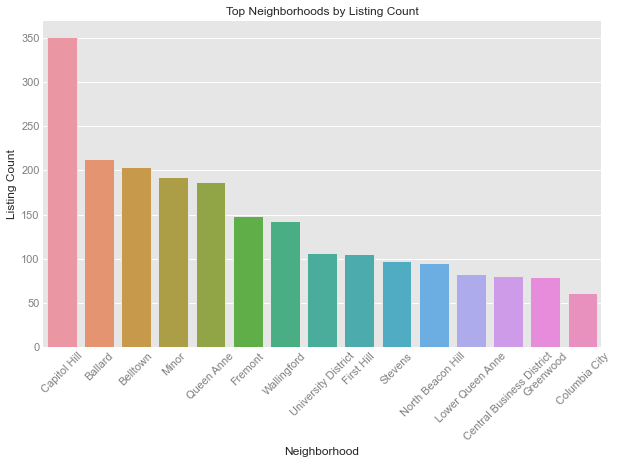

In [188]:
top_neighborhoods = listings_cleaned['neighbourhood'].value_counts()

plt.figure(figsize = (10,6))
sns.barplot(x=top_neighborhoods.index[:15], y = top_neighborhoods.values[:15])
plt.xlabel('Neighborhood')
plt.ylabel('Listing Count')
plt.title('Top Neighborhoods by Listing Count')
plt.xticks(rotation=45)
plt.show()

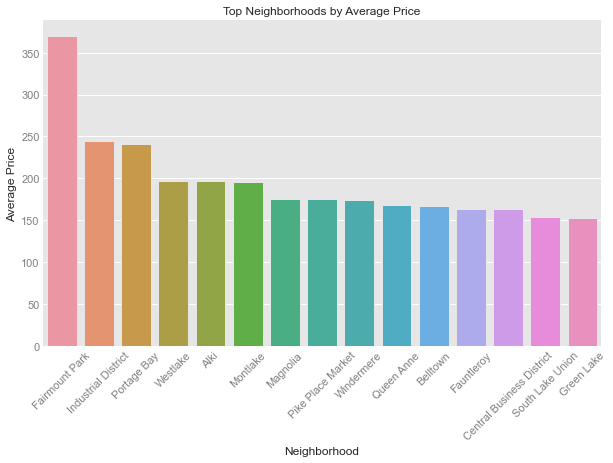

In [210]:
neiborhood_average_price = pd.DataFrame(listings_cleaned.groupby(['neighbourhood'])['price'].mean()).sort_values(by = ['price'],ascending = False)
plt.figure(figsize = (10,6))
sns.barplot(x=neiborhood_average_price.index[:15], y = neiborhood_average_price['price'][:15])
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Top Neighborhoods by Average Price')
plt.xticks(rotation=45)
plt.show()

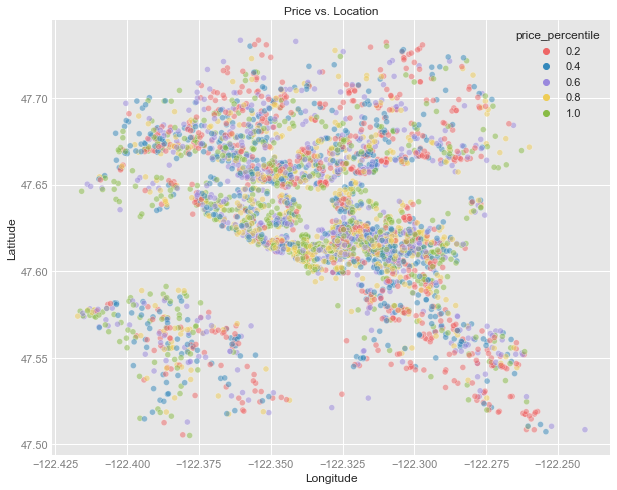

In [231]:

plt.figure(figsize=(10, 8))
sns.scatterplot(data=listings_cleaned, x='longitude', y='latitude' ,hue='price_percentile',alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price vs. Location')
plt.show()

In [181]:
listings_cleaned[['price','latitude', 'longitude']].corr()

,price,latitude,longitude
price,1.000000,-0.008904,-0.102420
latitude,-0.008904,1.000000,-0.155092
longitude,-0.102420,-0.155092,1.000000


In [182]:
listings_cleaned['host_id'].value_counts().head(10)

8534462     46
4962900     39
1243056     37
430709      36
3074414     34
74305       33
26967583    21
7354306     18
42537846    16
1623580     12
Name: host_id, dtype: int64